# Inference

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os, cv2, shutil, random
import json
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
from skimage import io
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline
from requests.compat import urlparse, urlunparse, urljoin
from bs4 import BeautifulSoup
import re
import requests
from requests import Session, request, get
import urllib.request
from urllib.request import urlopen
from urllib.error import URLError, HTTPError

from functools import reduce 
import sqlite3
import random

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from pathlib import Path

from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout, Input
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import metrics
from tensorflow.keras import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import resnet, resnet_v2, ResNet50, ResNet50V2, EfficientNetB3, InceptionV3, InceptionResNetV2
from tensorboard.plugins import projector

In [4]:
TARGET_SHAPE = (224,224,3)
def preprocess_image(filename: str):
    """
    Load the specified file as a JPEG image, preprocess it and
    resize it to the target shape.
    
    Args:
        filename: Absolute / Relative file path for the image
    
    Returns:
        Preprocessed inputs of type tensorflow.Tensor for Embedding Generation 
    """
    image_string = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image_string, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, TARGET_SHAPE[:2])
    image = resnet.preprocess_input(image)
    return tf.expand_dims(image, axis=0)


def generate_embedding(dataframe, embedding_generator):
    """
    Use the specified dataframe and Embeddings model to 
    calculate embeddings for all records in the dataframe
    
    Args:
        dataframe: Dataframe to get records for Embedding Generation
        embedding_genrator: Tensorflow Model to generate embeddings
    
    Returns:
        Dataframe with embeddings for each record.
    """
    embeddings_review = list()
    for i, row in tqdm(dataframe.iterrows(), total=dataframe.shape[0]):
        filename = row["image_path_review"]
        image = preprocess_image(filename)
        embedding = embedding_generator(image)
        embeddings_review.append(embedding[0].numpy().astype(np.float32).tolist())
    dataframe["embedding_review"] = embeddings_review
    embeddings_sample = list()
    for i, row in tqdm(dataframe.iterrows(), total=dataframe.shape[0]):
        filename = row["image_path_sample"]
        image = preprocess_image(filename)
        embedding = embedding_generator(image)
        embeddings_sample.append(embedding[0].numpy().astype(np.float32).tolist())
    dataframe["embedding_sample"] = embeddings_sample
    return dataframe

In [5]:
Midclass001005 = load_model("/content/drive/MyDrive/3rd_project/SiameseModels/Midcateg_001005_1216.h5", compile=False)

In [6]:
df_styleReview_001005_sim_matrix = pd.read_csv("/content/drive/MyDrive/3rd_project/df_styleReview_001005_sim_matrix.csv", dtype=object)

임의의 사진과 유사한 상품 뽑기

100%|██████████| 360/360 [00:00<00:00, 828.35it/s]


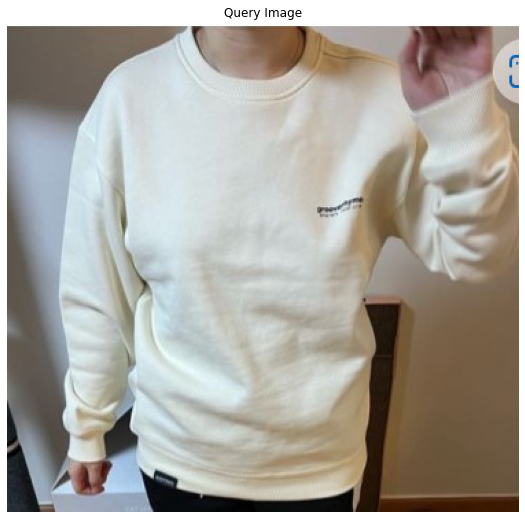

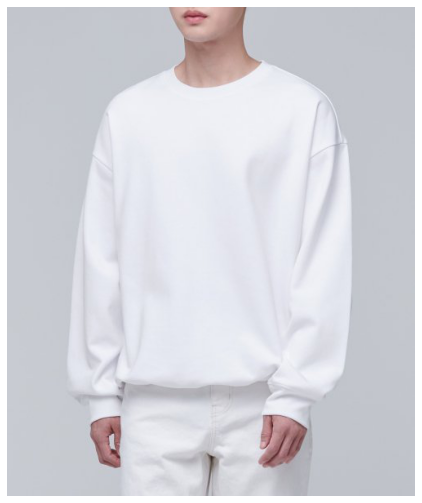

distance :  0.25834399461746216
2126150
Shop Now @  https://musinsa.com/app/goods/2126150


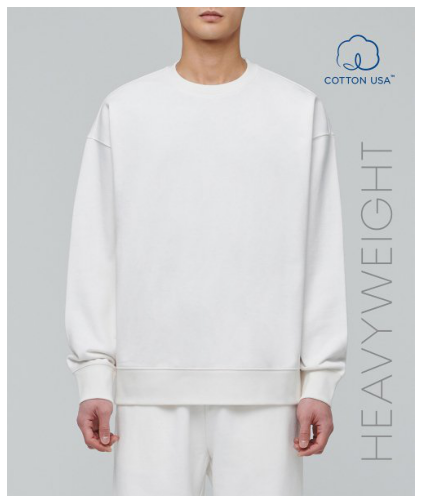

distance :  0.28424638509750366
1801424
Shop Now @  https://musinsa.com/app/goods/1801424


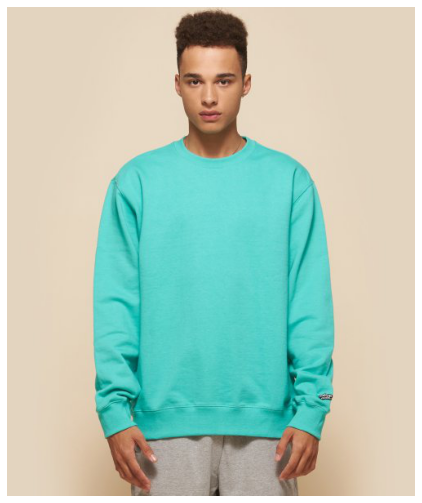

distance :  0.3144442141056061
719661
Shop Now @  https://musinsa.com/app/goods/719661


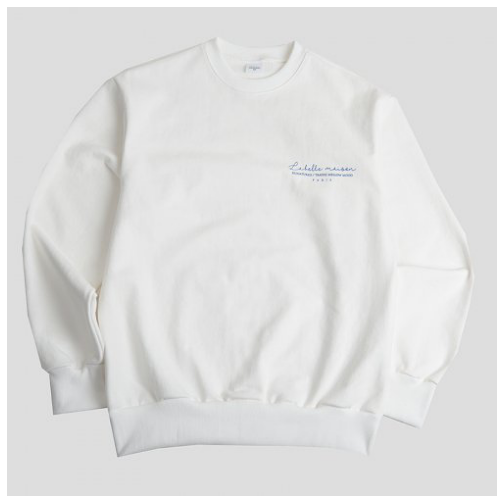

distance :  0.3150358200073242
953097
Shop Now @  https://musinsa.com/app/goods/953097


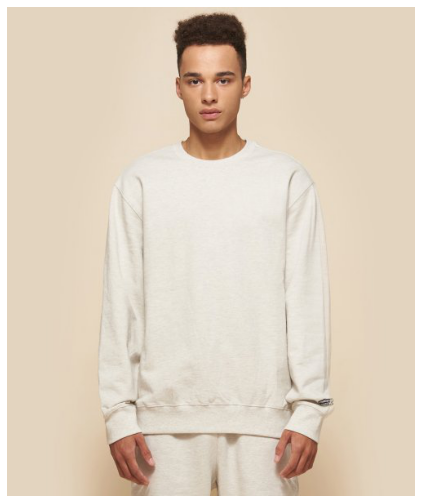

distance :  0.3160227835178375
824675
Shop Now @  https://musinsa.com/app/goods/824675


In [8]:
 tqdm.pandas()
query = "/content/drive/MyDrive/화면 캡처 2022-12-19 153324.jpg"
query_image = preprocess_image(query)
query_embedding_ = Midclass001005(query_image)[0].numpy().astype(np.float32).tolist()
query_embedding_ = str(query_embedding_)

df_styleReview_001005_sim_matrix['distance_samImg_queryRev'] = df_styleReview_001005_sim_matrix['embedding_sample'].progress_apply(lambda x: np.linalg.norm(np.asarray(eval(x), dtype=np.float32) - np.asarray(eval(query_embedding_), dtype=np.float32)))
df_styleReview_001005_sim_matrix = df_styleReview_001005_sim_matrix.sort_values(by='distance_samImg_queryRev').reset_index(drop=True)
plt.figure(figsize=(16,9))
plt.imshow(io.imread(query))
plt.title("Query Image")
plt.axis("off");plt.show()

print(254*"=")
print(254*"=")
j = 0
for i, row in df_styleReview_001005_sim_matrix.drop_duplicates("goods_id_pure",inplace=False).iloc[:5, :].iterrows():
    j += 1
    plt.figure(figsize=(16,9))
    image = io.imread(row["sample_path_drive"])
    plt.imshow(image);plt.axis("off")
    plt.show()
    print("distance : ", row["distance_samImg_queryRev"])
    print(row["goods_id_pure"])

    print("Shop Now @ ", ("https://musinsa.com/app/goods/" + row["goods_id_pure"]))
